## Build Simple RNN Model

In [76]:
import math
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [4]:
def build_rnn_model(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units,input_shape=input_shape,activation=activation[0]))
    model.add(Dense(dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [5]:
model = build_rnn_model(2,1,(3,1),activation=['linear', 'linear'])

In [8]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]

In [9]:
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.46695775 -0.4863497 ]]  wh =  [[-0.05584204 -0.99843955]
 [ 0.99843955 -0.05584216]]  bh =  [0. 0.]  wy = [[-0.12898588]
 [ 0.54036975]] by =  [0.]


In [12]:
x = np.array([1,2,3])

In [13]:
x_input = np.reshape(x,(1,3,1))

In [17]:
x_input.shape

(1, 3, 1)

In [18]:
y_pred = model.predict(x_input)

In [19]:
y_pred

array([[0.21021432]], dtype=float32)

In [26]:
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0],wx)+np.dot(h0,wh)+bh
h2 = np.dot(x[1],wx)+np.dot(h1,wh)+bh
h3 = np.dot(x[2],wx)+np.dot(h2,wh)+bh
o3 = np.dot(h3,wy)+by

In [35]:
print("Prediction from network ", y_pred)
print("Prediction from our computation ", o3)

Prediction from network  [[0.21021432]]
Prediction from our computation  [[0.21021426]]


### train sunspots dataset

In [46]:
 # Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python') 
    data = np.array(df.values.astype('float32')) 
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test 
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
train_data, test_data, data = get_train_test(url)

In [47]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps) 
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [71]:
model = build_rnn_model(hidden_units=3, dense_units=1, input_shape=(time_steps,1), activation=['tanh','tanh'])

In [72]:
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0081 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0050 - 329ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0047 - 297ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0046 - 305ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0044 - 296ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0043 - 320ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0042 - 310ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0042 - 297ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0041 - 352ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0040 - 330ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0039 - 313ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0038 - 320ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0039 - 319ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0037 - 318ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0038 - 329ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [77]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict)) 
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse)) 
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)


Train RMSE: 0.062 RMSE
Test RMSE: 0.089 RMSE


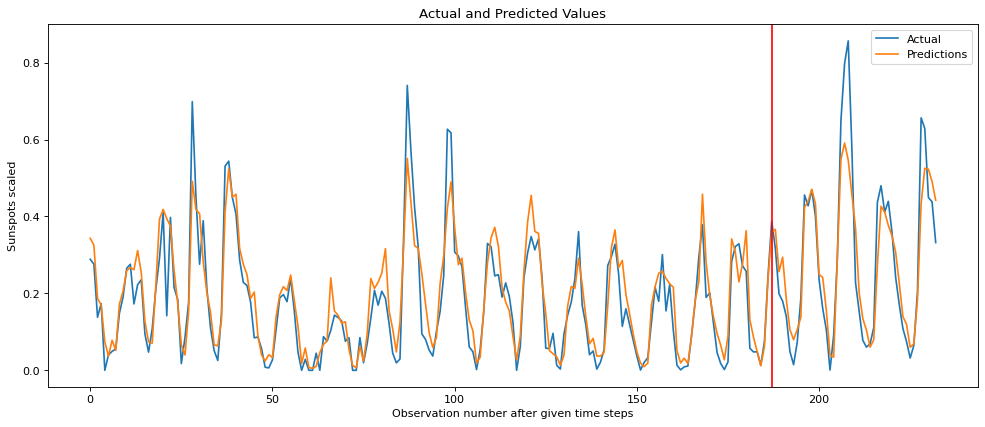

In [79]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict): 
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict) 
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values')

plot_result(trainY, testY, train_predict, test_predict)